# Cloud Day Talk
### by Rob Fatland 
#### rob5 at uw.edu 
##### Nov 12 2015

This IPython Notebook is from a talk I gave at the first UW Cloud Day on November 12 2015. It is available at github in the _percival_ project: https://github.com/robfatland/percival.

This material is intended to indicate directions and capabilities rapidly evolving in cloud computing with emphasis on the Microsoft Azure cloud technology stack. It is more of a random walk through the space since a comprehensive view of the subject would require a full course. 

As noted this Notebook is part of the _percival_ __Solution__ on github. Such a __Solution__ is a collection of __Projects__ (applications and supporting files) generated when using __Visual Studio__, the very powerful Microsoft Integrated Development Environment. This talk is in places unabashedly pro-Microsoft not in a partisan sense but simply to emphasize one path to productivity: Microsoft tools -- among many other choices -- help you build robust software, full stop.

In [1]:
# This cell takes care of imports and defines two relative paths needed later

imagepath = '../images/'
datapath = '../data/'

import numpy as np                                 # numerical python
import pandas as pd                                # pandas is advanced data manipulation
from PIL import Image                              # image display
from matplotlib.pyplot import imshow               # display image
from numpy import arange
import matplotlib.pyplot as plt

import urllib                                      # URL Library
import cStringIO                                   # needs short description kilroy
import json                                        # parse JSON
import urlparse                                    # parse URL
import requests                                    # message passing support

import netCDF4                                     # tools for unpacking NetCDF-format files
from netCDF4 import Dataset

In [2]:
# Print any plots inline rather than as pop-out windows
%pylab inline

# A dubious image rendering method smim() for trying to address resizing versus image quality...
def smim(path, file, desiredWidth, figdim):
    plt.figure(figsize=(figdim,figdim))
    imageFile = cStringIO.StringIO(urllib.urlopen(path+file).read())
    image = Image.open(cStringIO.StringIO(urllib.urlopen(path+file).read()))
    (w, h) = image.size
    imageResized = image.resize((desiredWidth, int(float(desiredWidth)*(float(h)/float(w)))), Image.NEAREST)
    imshow(np.asarray(imageResized))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().set_frame_on(False)
    
# This is included to illustrate Fog Bank, a tool box we will build and distribute at UW
# The code has nothing whatsoever to do with the cloud; but the point is not to be About The Cloud
# but rather to be about Getting Research Done. 

Populating the interactive namespace from numpy and matplotlib


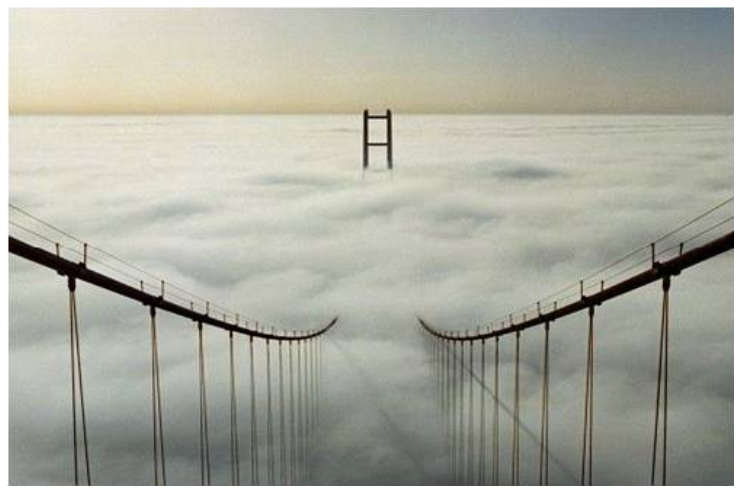

In [3]:
smim(imagepath, 'bridge-in-cloud.jpg', 500, 13)

Caption: Combining cloud and bridge metaphors: Research leads to what we don't know by definition; but it also crosses between domains as well as back into the practical world. Let's get going!

## Takeaways from this talk

* Premise: Researchers Do Not Care About The Cloud
* Real support is as close as the browser window (Stack Overflow etc)
* The Harsh Cloud Wild West is littered with power tools...
* Test locally... and actively seek out other good advice
* Python python python


## More takeaways

* The cloud is more familiar than strange
* Document document document. 
* Use Jupyter (ubiquitous) 
* Learn and use Visual Studio: A great option
* Python Tools For Visual Studio is an example of Microsoft Developer-centric integration
* pip install azure, netcdf4, ...
* Azure makes a Machine Learning studio available for assembling ML-driven workflows
* Rob's Law
* Figure out how ( figure out how ( figure out how ( ... (do something) ...)))

### Some narrative to go with the bullets above

Ideally I would like a Researcher to view cloud computing as a familiar environment... which is the case when as a Researcher you just want to get back to your basic computing tasks. You jump through some hoops and then you log into your Virtual Machine and get back to work. 


When it becomes tricky is when you are doing data-intensive work, such as cluster-based or distributed high performance computing. Then it becomes a question of who is out further into the frontier: You? Or Microsoft? Or Amazon? Or Google? In other words you need to take more time to assess the current state of the art. Perhaps you can take a small piece of your work into the cloud and benchmark it. Does that cloud provider have fast enough communication speed available? Or does your multi-core / multi-node job bog down because message passing has become the bottleneck? 


To address this I'm building a cloud resources section into the UW IT web pages. I'm taking other steps as well; but anyway my hope is that the word gets out, you know to go to that resource, and there you'll find an entry in an FAQ that looks like this: 


___Q: How do I keep pace with the rapid development of HPC on AWS / Azure / Google cloud?___

A: Blogs are your first tool. For Azure: Search on 'hpc tracker' on msdn blogs. For AWS: Search on 'kilroy fix this'. For Google: Search on 'kilroy fix this'. 


This brings out the subtext problem, the elephant in the room for research code reliability (and this is not a cloud-specific question): "How do I write code that works reliably and is not vulnerable to 'code rot' as the underlying system is upgraded?" Let's make that an FAQ question as well.


___Q: How do I make my code robust, self-diagnosing, stable over machine upgrades? Just write it once, use it forever is what I want.___

___A: I have good news and bad news for you. The good news is there are lots of *best practices* and I'm going to give you a starter list. The bad news is that code just plain requires maintenance over time; its the way of the world. Here's what you can do to 'do code well': Decide that you (or someone central to your research group) is going to take this process seriously for several months. Reading The Twelve Factor App (http://12factor.net). Learn about knowledge-base resources like Stack Overflow and MSDN. Explore YouTube "How to" videos. Learn and use github. Ask yourself "Will I understand this code in a year?" Document; not for you but for someone who has never even heard of your research program. Learn how to test your code using other tools than your code itself. And again: Anticipate that your code will always require care and maintenance.____


Now that we've separated out problems a little bit (robust code is your problem; building out the Wild West is the vendor companies' problem, keeping up with them is your problem, etc) let's turn to the stuff that drives the whole thing: Data.


___Q: What is Rob's Law and why should I care about it?___

___A: Rob's Law states 'Rob has no idea what he is doing.' You may be interested in a loose generalization applied to data as follows: 'I have no idea what I'm doing and I generate some data in a research project. Therefore I have no idea what this data is good for, even if I think I do' says Rob. 'Will the data be useful to somebody else? I have no idea. I hope so; that would be nice. Will they want it in my native format? No idea. Probably not...' Generalization of Rob's Law: 'Data is never collected in the form in which it is (re-)used.' Therefore I make my data available without superimposing my personal bias; as much as possible.___


This set of ideas is nothing new. It argues for data access APIs (what the author likes to call apiculture) that are developed according to { least development time, generic access, low latency, modularity }. These are really topics for another talk but let's bring up two implications of Rob's Law. 

The first _desirable consequence_ of Rob's Law is that a Researcher accesses his or her own data _solely_ by means of the API they built. That is, there is no inside knowledge / back door data access. This has already happened to a degree in certain research circles, for example to my knowledge in glaciology. 

The second is the Holy Grail of Rob's Law: That person A writes a paper that graces the cover of _Nature_ using data from person B, where A and B have never met and A has done no original data collection. This is data re-use success; and I think there should be a $20,000 prize offered to the first person who achieves that success. This does not constitute such an offer. 


## Call To Action!

* Help { Cloud iTeam } build the Fog Bank

The iTeam are early-adopters of the cloud in research. All are welcome. The only _contract_ is that you contribute documentation of your successes and failures to the Fog Bank, a set of data science tools we will make available (hopefully through UW IT and eScience web pages, hopefully through something like washington.edu/cloud...) But be advised: Fog Bank is about getting research compute working for you; it's not about _cloud for cloud's sake_. 

The remainder of this notebook is Things to Do and Explore. It is _detail_ oriented and _Project_ oriented with _Digressions_.


#### Want new ideas? Go explore Microsoft Research!

* Microsoft often means Open Source (you're thinking 'well duh!')
    * http://research.microsoft.com/downloads
    * http://research.microsoft.com: The company's representation of MSR
* Example: Computational Network Tookit (CNTK) is open source Deep Neural Net software

#### Microsoft is also _very biased_ towards enabling Python in the the Azure cloud

* Azure + Python tech picture:
    * Python Tools for Visual Studio (PTVS)
    * Python SDK for Azure Services
    * Visual Studio Python Toolkit _for Azure_
    * Azure Machine Learning Studio and Python
    * Python SDK for Azure Machine Learning
    * Jupyter in Azure Machine Learning
    * Anaconda distributions for Windows and Linux

#### Projects I touch on below

* BDS spans from microbial ecology to marine geochemistry
* LiveOcean, Ice2Ocean

#### Projects I do not touch on below... for another time

* AralDIF    
* Visualization (Narwhal : Glaciers : Distributions : Large Datasets : Time Series : Behavior : And so on)
* Flow Cytometry and Azure Machine Learning Studio

# Project 1: Biogeochemistry Data System (BDS)

This project is concerned with organizing data concerned with organic carbon dissolved in water. The point here is to emphasize data provenance and reproducibility. A large number of data files are inhaled per the diagram below (top row has a lot of sample files) and automatically processed. 

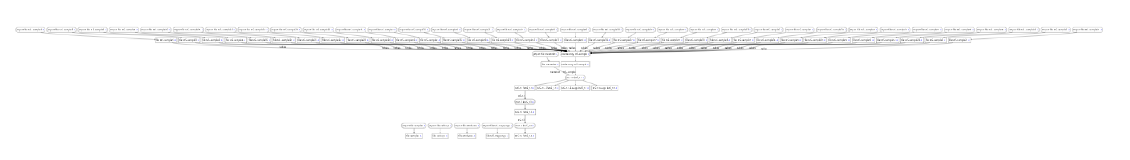

In [4]:
smim(imagepath, 'BDS_Provenance_All.png', 3000, 20)

Caption: The image above is a workflow from about 50 input files through a data reduction process. Below is a detail from this image. Notice that files are in rectangular boxes and action-modules are in round boxes. Each blue > sign is a link that opens up a 'drill down into the details' view.

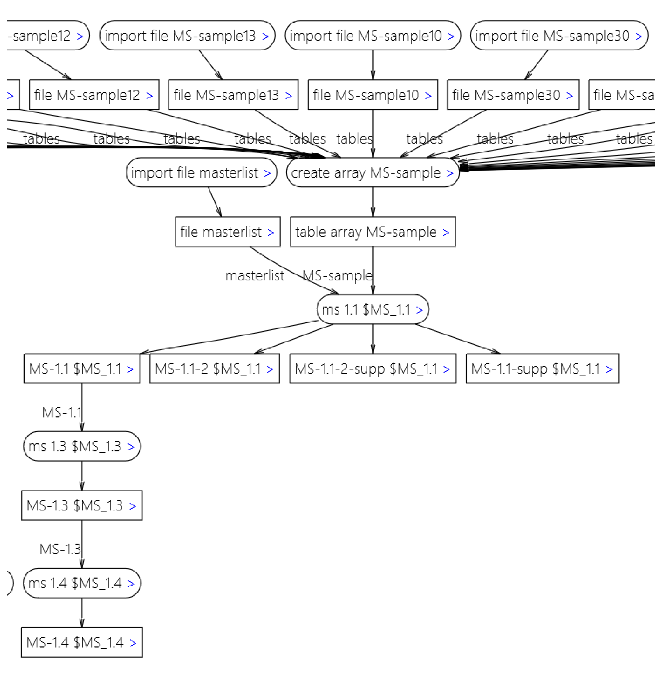

In [5]:
smim(imagepath, 'BDS_Provenance_Detail.png', 2500, 12)

The entire assembly can be downloaded as a tar file and run again to reproduce the output results. This idea of reproducibility is a basic tenet of research and particularly data processing. 

# Digression 1: Executable papers

Executable papers are conceptually supported by a growing list of technologies and entities: Scientific journals, publishers, Virtual Machines, Docker containers, iPython Notebooks, the workflow reconstruction shown above, and so on. Here are some related ideas:

* Private > Publish: address the perceived need for data privacy (non-sensitive data category)
* Geochemistry > Any perfunctory data chain: Can workflow-based systems be re-applied across domains?
* Value to participate
* Free MATLAB execution
* Levels
* Provenance tree
* Query construction P|P
* Publish elsewhere via confederation
* API culture 


### Bridging to Project 2: Oreskes to OSTP

* In 2004 Naomi Oreskes -- science historian -- publishes 'Beyond The Ivory Tower'
    * Study of peer review abstracts in relation to AGCC
* Many implications but of particular interest is OSTP/CDI/'resiliency'
* The political questions concern stability and brokerage
* They create a push back that eventually implies API culture: Who is the consumer?

# Project 2 Live Ocean

This project predicts the state of ocean water in a volumetric cell sense. It makes 72 consecutive predictions (hourly) spanning three days over a section of the northeast Pacific Ocean. We begin with a sequence of images to give a sense of the project. We then continue by exploring the LiveOcean API.

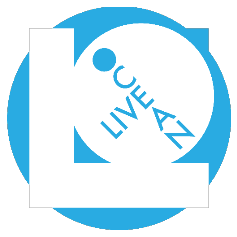

In [6]:
smim(imagepath, 'LiveOcean Logo.png', 500, 4)

Caption: This is the LiveOcean logo put together by Parker MacCready, the Principal Investigator.

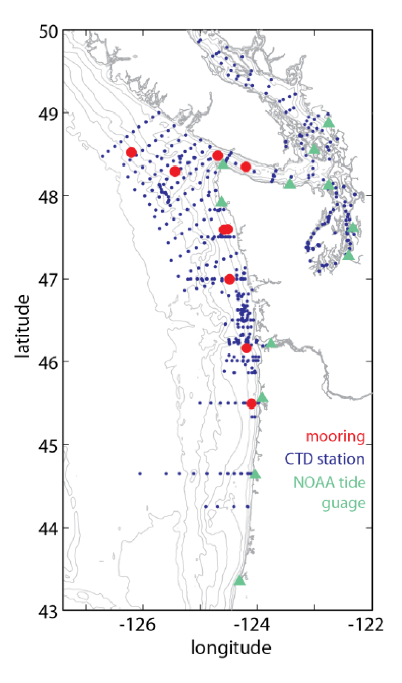

In [7]:
smim(imagepath, 'region of interest with validation moorings indicated.png',1200,12)

Caption A map of the first LiveOcean region of interest. The colored stations indicate places where actual data are gathered, providing an opportunity to validate LiveOcean forecasts. 

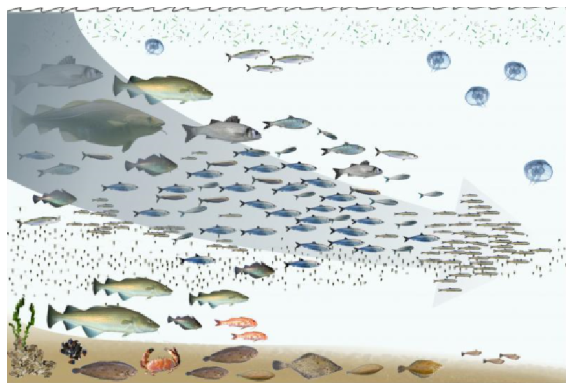

In [8]:
smim(imagepath, 'marine trophic level diagram placeholder.png', 800, 10)

Caption A typical 'trophic food web' diagram indicating that the small are the foundation for the bigger, and so on. Also indicated here is the distinction between zooplankton (tip of the arrow) and phytoplankton (up near the surface by the sunlight.)

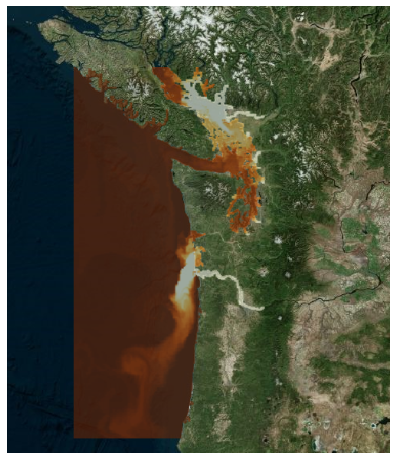

In [9]:
smim(imagepath, 'region of interest bing maps overlay surface salinity orange colormap.png', 500, 8)

Caption The region of interest color-coded by surface salinity. Notice the Columbia River freshwater outflow at center, for example.

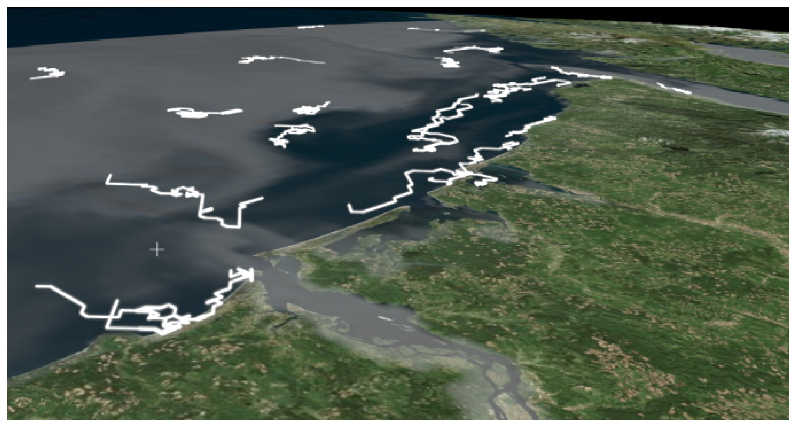

In [10]:
smim(imagepath, 'LiveOcean zooplankton whale simple example.png', 1600, 14)

Caption I used a simple gradient algorithm to provide paths for hungry plankton-seeking ___whales___. This emphasizes that the LiveOcean model is not just physical parameters like temperature and salinity, but rather includes a biological forecast as well. 

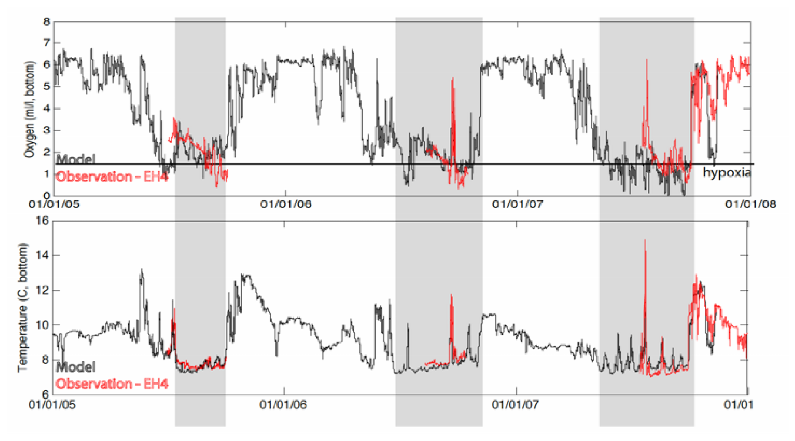

In [11]:
smim(imagepath, 'ROMS model validation from Siedlecki.png', 2000, 14)

Caption Observation data in black can be compared to forecast data in red. There are many instances where the Live Ocean model -- ROMS for Regional Ocean Modeling System -- performs strikingly well. In cases where it errs the scientists explore why and consider how the model might be improved. It is the dedication to testing and validation that gives the research group its scientific integrity, if you will, and this is in turn a basis for providing the data in forecast mode.

### LiveOcean API

We will use the LiveOcean Applications Programming Interface (API) to get some forecast data. Unfortunately unless you modify this call it will be a forecast from the past but it is still fun to do. The API call is constructed by appending text at the end of a basic web address (URL). This is interpreted by the application we have installed on the Microsoft Azure cloud using Visual Studio. I now deconstruct this further in case you are not familiar with the design pattern.

#### First: Generate the data

_'Something happens'_ to produce data in the cloud. This data is comprehensive and in a rather arcane format called NetCDF and it is destributed across many files; so it is not legible by an imagined Customer. 

#### Second: Provide a translational API

The project originators build from existing templates (in our case the Python-friend Django web framework published to Azure) to provide an API and a published set of rules on how to use it. The contract between Live Ocean and the rest of the world is then 'Follow the API rules and LiveOcean will do the necessary seeking and formatting in its data store to provide you with just the information you want.' 

#### Third: Build a Client for the Customer

We build a _browser __Client___ that provides some options for accessing this data. The Customer clicks on the URL and this Client subsequently runs in their browser. After some configuration process (selecting a date for example) the Client starts building API calls as described above.

#### Fourth: Data/information is delivered to the Customer

The replies to the API call are marshaled by the Client and displayed for the Customer. This may be as a chart, as a map overlay, as a table of numbers; there are no set rules. This applies as well to the venue: A LiveOcean client need not run in a browser. To take an extreme example: If the Client were to infer a forecast 'best location' for catching fish it could broadcast those coordinates over VHF to a fishing vessel. 

In [6]:
# Establish the LiveOcean API base URL
liveoceanUrl = "http://liveocean.azurewebsites.net/api/"

In [7]:
# Here is the get-value api call: JSON format, contents are data (in this case salinity at 10 meters depth)
requestcall = "get-value"
data_args = {'date':'2015-06-02T06:00:00Z', 'depthMeters':'-10.0','param':'salt'}
apiReply = requests.get(urlparse.urljoin(liveoceanUrl, requestcall), params=data_args)

print 'Call =', apiReply.url 
print 'Reply status is', apiReply.ok
print 'Status code is', apiReply.status_code, '\n'

# convert response to json
jsonReply = apiReply.json()
print 'jsonized get-value reply is of', type(jsonReply), '; length', len(jsonReply)

# pull out the dictionary entries, 'min', 'max' and 'data'
minValue = jsonReply['min']
maxValue = jsonReply['max']
print 'minValue is of', type(minValue), 'with value', minValue
print 'maxValue is of', type(maxValue), 'with value', maxValue
print ""
print ""
data=jsonReply['data']
print 'The data entry of this dictionary is of', type(data)

# Determine the dimensions of the data List-of-Lists
numLists = len(data)
numElementsPerList = len(data[0])
print 'API getvalue provides', numLists, 'lists each with', numElementsPerList, 'elements','\n'

# Print a couple of exemplars, one from the water and one from the masked-out land
print 'element 341 of list 131, data[130][340], is',data[130][340],'which is ',type(data[130][340]),'\n'
print 'element 381 of list 174, data[173][380], is',data[173][380],'which is ',type(data[173][380]),'\n'

# Count the number of float values and 'Nones' to ensure they sum to the total grid cell count
nFloat = 0
nNone = 0
for s in data:
    for t in s:
        if (isinstance(t,float)):
            nFloat += 1
        else:
            nNone += 1
        
print 'floats:',nFloat,'and Nones:',nNone, 'sum is',nFloat+nNone,'and area is',numLists*numElementsPerList
print ""

if nFloat + nNone != numLists*numElementsPerList:
    print ""
    print "data check finds a discrepancy between expected types and grid area."
    print ""
    print "SERIOUS PROBLEM, data field is not self-consistent"
    print ""
    print ""
else:
    print ""
    print "data check shows 2D array data are self-consistent"
    print ""

Call = http://liveocean.azurewebsites.net/api/get-value?date=2015-06-02T06%3A00%3A00Z&depthMeters=-10.0&param=salt
Reply status is True
Status code is 200 

jsonized get-value reply is of <type 'dict'> ; length 3
minValue is of <type 'float'> with value 0.0
maxValue is of <type 'float'> with value 9.99999993382e+36


The data entry of this dictionary is of <type 'list'>
API getvalue provides 174 lists each with 381 elements 

element 341 of list 131, data[130][340], is 30.5909303454 which is  <type 'float'> 

element 381 of list 174, data[173][380], is None which is  <type 'NoneType'> 

floats: 36284 and Nones: 30010 sum is 66294 and area is 66294


data check shows 2D array data are self-consistent



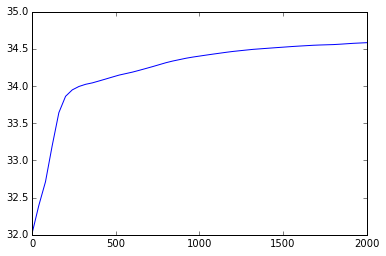

In [16]:
# A series of get-value api calls illustrates both the value and the drawback of a simple API.
#   The results as before come back in JSON format. Each is a sheet of data spanning the geographic
#   region of interest. However the goal is to produce a vertical salinity profile at just one location 
#   on the map. We are asking for more data than we need; to change this would require changing the API.

# The index of the array for the location of interest
lonIndex = 10
latIndex = 10

myD = []
myS = []
signal = []

depthIntervalMeters = 40.0
for x in arange(0.0, 2001.0, depthIntervalMeters):
    thisDepth = str(-x)
    requestcall = "get-value"
    data_args = {'date':'2015-06-02T06:00:00Z', 'depthMeters':thisDepth,'param':'salt'}
    apiReply = requests.get(urlparse.urljoin(liveoceanUrl, requestcall), params=data_args)
    jsonReply = apiReply.json()
    data = jsonReply['data']
    
    # accumulate the depth and forecast salinity Lists
    myD.append(x)
    myS.append(data[10][10])
     
plt.plot(myD, myS)

### Digression 2: Deconstructing a NetCDF file using Python

Now that I've shown the use (and mis-use) of the LiveOcean API I will look out into the world wide web for some independent validation of the LiveOcean forecast, specifically for June 2 2015. 

To attack that problem fortunately we have the ARGO drifters and their associated data. These devices drift at a depth of about 1000 meters and then create a rising profile every week or so from 2000 meters to the surface. They report home via satellite modem. Like LiveOcean the ARGO data are in NetCDF files so this _digression_ is about deconstructing those files to get at the data inside. 

I conclude by comparing a profile from ARGO (vertical through the water column) with a profile from LiveOcean, specifically the one shown above where the water becomes more saline with depth with a distinct elbow at about 200 meters below the ocean surface. This is what Parker predicts for a particular time and place out there. Will ARGO back him up?? 


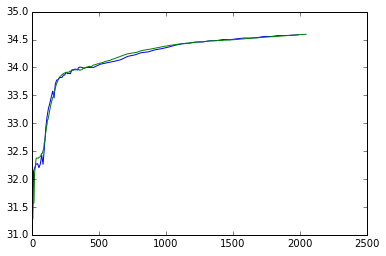

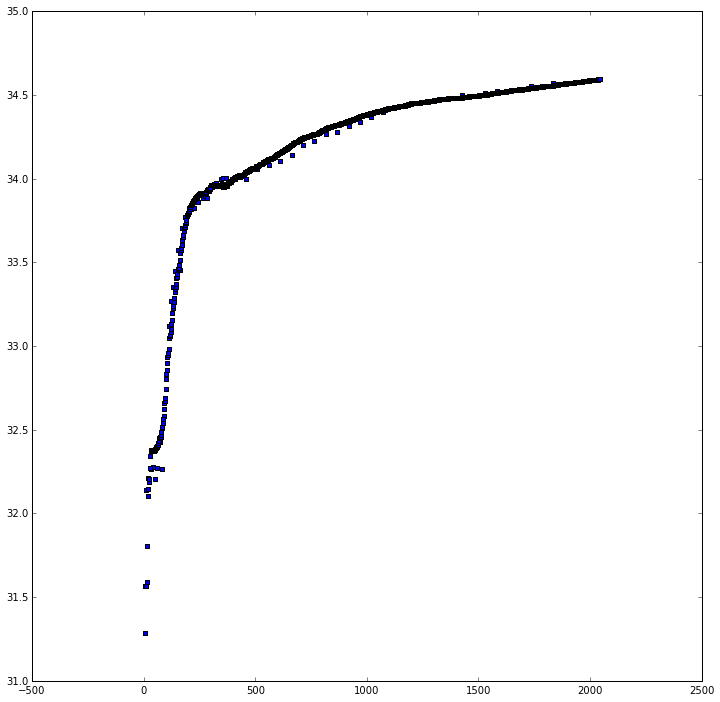

In [17]:
# ARGO drifters produce and telemeter data from the earth's oceans.

# How we might explore the netCDF4 Library:
# print dir(netCDF4)
# We particularly might eventually care about Dataset and num2date

# Not intended to be an operational conversion constant!
decibarsToMeters = 1019.977/1000.0

# Here are a couple of ARGO profiling files I retrieved
# The amount of effort to recover them is beyond the scope of this talk
#   ...however I believe their respective profile data should be comparable.
f = Dataset(datapath + "R5903601_130.nc",'r', Format='NETCDF4')
g = Dataset(datapath + "argo-profiles-4901664.nc",'r',Format='NETCDF4')

# From the following two lines I culled out some interesting variables...
# 
# for v in f.variables:
#     print [v]
# 
# Notice they are encoded with the unicode lead-character 'u':
# 
# [u'REFERENCE_DATE_TIME']
# [u'DATE_CREATION']
# [u'DATE_UPDATE']
# [u'PLATFORM_NUMBER']
# [u'PROJECT_NAME']
# [u'PI_NAME']
# [u'STATION_PARAMETERS']
# [u'CYCLE_NUMBER']
# [u'DIRECTION']
# [u'DATA_MODE']
# [u'PLATFORM_TYPE']
# [u'JULD']
# [u'LATITUDE']
# [u'LONGITUDE']
# [u'POSITIONING_SYSTEM']
# [u'VERTICAL_SAMPLING_SCHEME']
# [u'PROFILE_PRES_QC']
# [u'PRES']
# [u'PRES_ADJUSTED']
# [u'TEMP']
# [u'TEMP_ADJUSTED']
# [u'PSAL']
# [u'PSAL_ADJUSTED']
# [u'SCIENTIFIC_CALIB_COMMENT']
# 
# So more on these below; let's first get to the main points for salinity and depth

# Pressure will be a proxy for depth. Salinity increases with depth. Temp decreases with depth.
psalLabel=u'PSAL'
presLabel=u'PRES'
tempLabel=u'TEMP'

# Provide both the units of measure and the array dimensions for the data
# print "Here is from the first file 'f':"
# print ""
# print f.variables[psalLabel].units
# print f.variables[psalLabel].shape
# print f.variables[presLabel].units
# print f.variables[presLabel].shape
# print f.variables[tempLabel].units
# print f.variables[tempLabel].shape
# print ""
# print ""
# print "Here is from the second file 'g':"
# print ""
# print g.variables[psalLabel].units
# print g.variables[psalLabel].shape
# print g.variables[presLabel].units
# print g.variables[presLabel].shape
# print g.variables[tempLabel].units
# print g.variables[tempLabel].shape
# print ""
#print ""


# From the 2-D data we pull 1-D arrays using the wildcard ':' character
#   This follows after just test-printing everything! [0] is the important stuff
salinity=f.variables[psalLabel][0,:]
pressureDecibars=f.variables[presLabel][0,:]
temperature=f.variables[tempLabel][0,:]

# Using an approximate conversion constant we go from pressure to depth
depthMeters = pressureDecibars*decibarsToMeters

# Here is the salinity versus depth plot
# plot(depthMeters,salinity)

# Let's hold off before we do the comparison:
# plot(myD, myS)


# From the 2-D data we pull 1-D arrays using the wildcard ':' character
#   This follows after just test-printing everything! [0] is the important stuff
salinity2 = g.variables[psalLabel][0,:]
pressureDecibars2 = g.variables[presLabel][0,:]
temperature2 = g.variables[tempLabel][0,:]

# Using an approximate conversion constant we go from pressure to depth
depthMeters = pressureDecibars*decibarsToMeters
depthMeters2 = pressureDecibars2*decibarsToMeters

# Here is the salinity versus depth plot for the two respective source files f and g
plot(depthMeters,salinity)
plot(depthMeters2,salinity2)
figdim = 12
figure(figsize=(figdim,figdim))
scatter(depthMeters, salinity, marker = ',')
scatter(depthMeters2, salinity2, marker = ',')

In [18]:
# This cell determines location and time of the data (irrespective of drift velocity << LiveOcean cell size)

import datetime

latLabel=u'LATITUDE'
lonLabel=u'LONGITUDE'

# Of the following 'DATE_CREATION' and 'DATE_UPDATE' were identical and useful
refDTLabel=u'REFERENCE_DATE_TIME'
dateCreationLabel=u'DATE_CREATION'
dateUpdateLabel=u'DATE_UPDATE'
juldLabel=u'JULD'

# print f.variables[latLabel].shape
# print f.variables[lonLabel].shape
# print f.variables[latLabel][:]
# print f.variables[lonLabel][:]

# print f.variables[refDTLabel][:]
# print f.variables[dateCreationLabel][:]
# print f.variables[dateUpdateLabel][:]
# print f.variables[juldLabel][:]

# From the above (commented out) we determine:

argoLat = 44.152
argoLon = -126.483
argoDate = datetime.datetime(2015,6,2,5,31,34)

print 'The data are timestamped at approximately', argoDate

# Now what is needed...
# Data and Time for this data...
# Cell values (all 40) at that location from LO

# This cell prints out some other interesting information from the NetCDF file

print 'Platform number (expect 5903601):', f.variables[u'PLATFORM_NUMBER'][0,:]

print 'Project name:', f.variables[u'PROJECT_NAME'][0,:]
print 'PI name:', f.variables[u'PI_NAME'][0,:]
print 'Station parameters:', f.variables[u'STATION_PARAMETERS'][0,:]
print 'Cycle number (expect 130):', f.variables[u'CYCLE_NUMBER'][:]
print 'Direction:', f.variables[u'DIRECTION'][:]
print 'Data mode:', f.variables[u'DATA_MODE'][:]
print 'Platform type:', f.variables[u'PLATFORM_TYPE'][0,:]
print 'Positioning system:', f.variables[u'POSITIONING_SYSTEM'][0,:]

# and so on... 
# print 'Vertical sampling scheme:', f.variables[u'VERTICAL_SAMPLING_SCHEME'][:]
# print 'Scientific calibration comment:', f.variables[u'SCIENTIFIC_CALIB_COMMENT'][0,0,0,:]



# The CTD has "adjusted" versions of the data: Are they the same or different???
# These lines show that adjusted pressure is off by 30 cm and salinity and temperature are ok
pressureAdjusted = f.variables[u'PRES_ADJUSTED'][0,:]
# print pressureAdjusted - pressureDecibars
tempAdjusted = f.variables[u'TEMP_ADJUSTED'][0,:]
# print tempAdjusted - temperature
psalAdjusted = f.variables[u'PSAL_ADJUSTED'][0,:]
# print psalAdjusted - salinity

The data are timestamped at approximately 2015-06-02 05:31:34
Platform number (expect 5903601): ['5' '9' '0' '3' '6' '0' '1' --]
Project name: ['U' 'S' -- 'A' 'R' 'G' 'O' -- 'P' 'R' 'O' 'J' 'E' 'C' 'T' -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
PI name: ['S' 'T' 'E' 'P' 'H' 'E' 'N' -- 'R' 'I' 'S' 'E' 'R' -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
Station parameters: [['P' 'R' 'E' 'S' -- -- -- -- -- -- -- -- -- -- -- --]
 ['T' 'E' 'M' 'P' -- -- -- -- -- -- -- -- -- -- -- --]
 ['P' 'S' 'A' 'L' -- -- -- -- -- -- -- -- -- -- -- --]]
Cycle number (expect 130): [130 130]
Direction: ['A' 'A']
Data mode: ['A' 'A']
Platform type: ['A' 'P' 'E' 'X' -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- --]
Positioning system: ['A' 'R' 'G' 'O' 'S' -- -- -

### Does ARGO Validate LiveOcean in this one example?¶

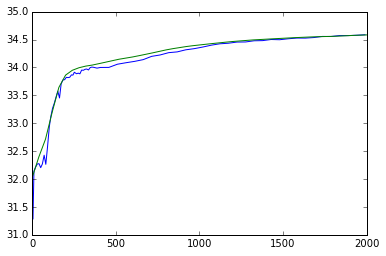

In [19]:
plot(depthMeters,salinity)
plot(myD, myS)

Caption Certainly to first or second order the ARGO profile (blue) corroborates the LiveOcean forecast profile in green. LiveOcean does not capture the detailed structure observed by ARGO; nor is this by any means an exhaustive test. However it is certainly _encouraging_ and the over-arching conclusions are as follows: 

* Python can be used to interactively explore datasets in challenging formats such as NetCDF.
* Python can be used to construct API calls and recover data from JSON-style replies.
* Microsoft has assembled a development environment -- Visual Studio -- that integrates well with the Microsoft Azure cloud, with Python, with the Django web framework, and with github that has made the LiveOcean application relatively easy to build and deploy. 

# Returning to the Microsoft Cloud Technology Stack

## Projects, Solutions

* Explore http://research.microsoft.com for tools and projects
* Open source examples: Computational Network Toolkit, Tabular, FetchClimate, WRF on Azure, ...
* Explore YouTube videos around Visual Studio. Examples around Python include PTVS, Flask, Bottle, Django
* At UW: Open Source: LiveOcean, Ice2Ocean
* BDS Geochemistry online data Library
* Visualization: Worldwide Telescope + Narwhal (1e7 data points; time; geometry)


## Visual Studio

* Host your software in the Azure cloud; also git-friendly
* Easy to collaborate on (Big!) software projects: Add people
* Tools for managing software development: Backlog, task lists, charting...
* Plays well with languages (python) and development environments (eclipse)
* Free


${\LARGE INTELLISENSE}$

* PTVS
* Python SDK for Azure Services... a library
* Azure Machine Learning Studio and Python
* Python SDK for Azure Machine Learning
* Jupyter in Azure Machine Learning
* Anaconda distributions

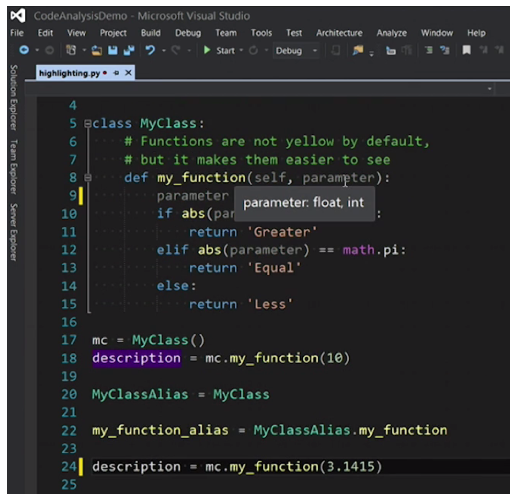

In [21]:
smim(imagepath, 'Visual Studio python code editor features.png', 2400, 9)

## URLs


### WRF running on the Azure cloud
* http://weatherservice.cloudapp.net and please note that 'Northwind' is not a real company. This WRF instance was built by Wenming Ye and others out of Microsoft.


### Visual Studio
* Get it! https://www.visualstudio.com/
* Intellisense: https://msdn.microsoft.com/en-us/library/hcw1s69b.aspx



### Azure
* Azure: http://azure.microsoft.com
* Azure For Research: http://azure4research.com (a short compelling proposal nets you 6 months of Azure cloud resources)
* Azure blob storage: https://azure.microsoft.com/en-us/documentation/articles/storage-python-how-to-use-blob-storage/
* Azure Machine Learning Studio: https://studio.azureml.net/Home
* Azure Resource Explorer: http://azure.microsoft.com/blog/2015/04/02/azure-resource-explorer-a-new-tool-to-discover-the-azure-api/



### Python
* Python tools for Visual Studio: http://github.com/Microsoft/PTVS/releases
* Steve Dower's video overview of python in Visual Studio: http://aka.ms/ptvs 
* More excellent video overviews from Steve: https://www.visualstudio.com/en-us/explore/dn919931#Fragment_Videos
* PyData conference in Seattle July 24-26 http://conf.pydata.org/seattle2015/
* Why use Virtual Environments for python in the cloud? https://github.com/Microsoft/PTVS/wiki/Python-Environments
* Nice condensation of python data structures: https://docs.python.org/2/tutorial/datastructures.html#tuples-and-sequences
* DANGEROUS!!! WARNING!!! TEST SITE ONLY!!! Public Jupyter: http://ipnb.azurewebsites.net/



Contact me about the above and about the {Cloud iTeam} at rob5@uw.edu

# Appendix on 12 Factor Apps

Summary of 12 Factor Web Apps
1. One codebase tracked in revision control, many deploys. Codebase:App is 1:1.
2. Explicitly declare and isolate dependencies (don't make assumptions about the underlying environment!)
3. Store configuration ('_config_') settings in the environment, note in the code base.
4. Treat backing services as attached resources. This is a decoupled or modular approach.
5. Use strict separation between the build, release, and run stages. (It is impossible to make changes to the code at runtime since there is no way to propagate those changes back to the build stage.)
6. Execute the app as one or more stateless processes that share nothing. (Any data that needs to persist must be stored in a stateful backing service, typically a database.)
7. Be completely self-contained; do not rely on runtime injection of a webserver into the execution environment to create a web-facing service. Rather: The web app exports HTTP as a service by binding to a port, and listening to requests coming in on that port.
8. Use process types; where processes are first class citizens: Taking strong cues from the unix process model (service daemons): The developer architects the app to handle diverse workloads by assigning each type of work to a _process type_. For example, HTTP requests may be handled by a web process whereas long-running background tasks may be handled by a worker process.
9. Disposability: Processes are disposable: Can be started or stopped at a moment’s notice. This facilitates fast elastic scaling, rapid deployment of code or config changes, and robustness of production deploys.
10. Dev/production similarity: Continuous deployment that keeps the gap between development and production small.
    * Make the time gap small: a developer may write code and have it deployed hours or even just minutes later.
    * Make the personnel gap small: developers who wrote code are closely involved in deploying it and watching its behavior in production.
    * Make the tools gap small: keep development and production as similar as possible.
11. Treat logs as event streams. Logs are the stream of aggregated, time-ordered events collected from the output streams of all running processes and backing services, typically a text format with one event per line (though backtraces from exceptions may span multiple lines). Logs have no fixed beginning or end, but flow continuously as long as the app is operating. A twelve-factor app never concerns itself with routing or storage of its output stream. It should not attempt to write to or manage logfiles. Instead, each running process writes its event stream, unbuffered, to stdout. During local development, the developer will view this stream in the foreground of their terminal to observe the app’s behavior.
12. Run _admin_ tasks like any other process in the app. The _process formation_ is the array of (_typed!_) processes that are used to do the app’s regular business (such as handling web requests) as it runs. Separately, developers will often wish to do one-off administrative or maintenance tasks for the app, such as...
    * Running database migrations (e.g. manage.py migrate in Django).
    * Running a console (also known as a REPL shell) to run arbitrary code or inspect the app’s models against the live database. Most languages provide a REPL by running the interpreter without any arguments (e.g. python or perl) or in some cases have a separate command (e.g. irb for Ruby, rails console for Rails).
    * Running one-time scripts committed into the app’s repo (e.g. php scripts/fix_bad_records.php).
One-off admin processes should be run in an identical environment as the regular long-running processes of the app. They run against a release, using the same codebase and config as any process run against that release. Admin code must ship with application code to avoid synchronization issues.
